<a href="https://colab.research.google.com/github/sksamima5/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.**#
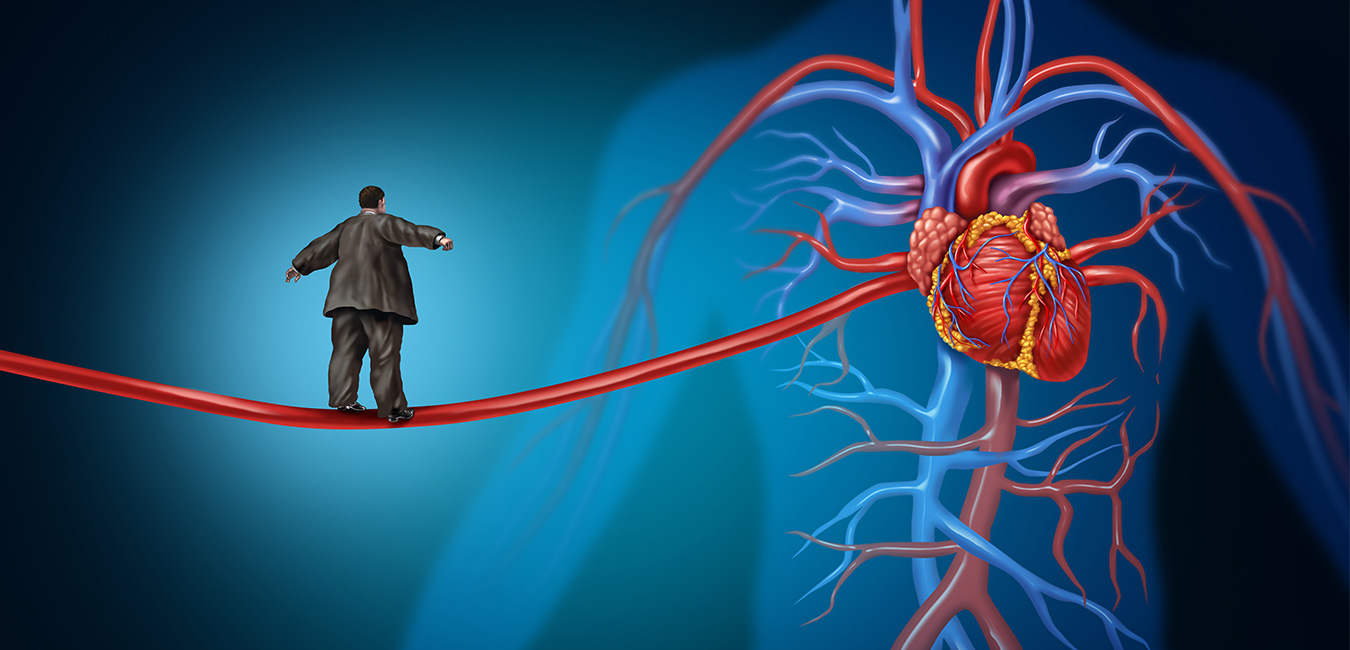


## <b> Data Description </b>

###**Demographic:**###
*  Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

###**Behavioral**###
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

###**Medical(history)**###
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

###**Medical(current)**###
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

###**Predict variable (desired target)**###
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

##**The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.**##

#**Installing Modules**#

#**Importng the Libraries**#

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from sklearn.preprocessing import MinMaxScaler,StandardScaler



# Importing warning for ignore warnings 
import warnings
warnings.filterwarnings("ignore")

# Import Gridsearch cv & Randomsearch cv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import evalution matrices
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve, auc,make_scorer

# Imports for visualizing Decision Tree
from sklearn.datasets import*
from sklearn.tree import*
from IPython.display import Image,display_svg,SVG
from sklearn import tree
from imblearn.combine import SMOTETomek



In [2]:
#Importing Dataset to create dataframe
heart_data = pd.read_csv('/content/drive/MyDrive/Capstone project ml classification cardiovascular risk prediction/data_cardiovascular_risk.csv')
heart_data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [3]:
#checking the shape of dataframe
heart_data.shape

(3390, 17)

In [4]:
#checking top 5 rows of data
heart_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#checking bottom 5 rows of data
heart_data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#Dropping the id column because it not so important for our analysis
heart_data.drop(columns=['id'], inplace=True)

In [7]:
#Checking the shape of Dataset with rows and columns 
print(f' The shape of dataset is {(heart_data.shape)} \n Total Rows are : {(heart_data.shape)[0]}\n Total Columns are : {(heart_data.shape)[1]}')

 The shape of dataset is (3390, 16) 
 Total Rows are : 3390
 Total Columns are : 16


In [8]:
#Checking deatils about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [9]:
#Checking all the columns of dataset
print(f'All the columns in the dataset:')
heart_data.columns

All the columns in the dataset:


Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
#Checking the Null/Missing values
heart_data.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [11]:
#checking the description of dataset
heart_data.describe(include = 'all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


#**Missing value treatment**#

In [12]:
# Missing data counts and percentage
missing = heart_data.columns[heart_data.isnull().any()].tolist()

print('Missing Data Count')
print(heart_data[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(heart_data[missing].isnull().sum().sort_values(ascending = False)/len(heart_data)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [13]:
#replace null values with median
for col in ['glucose', 'education', 'BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']:
  heart_data[col]= heart_data[col].fillna(heart_data[col].median())

In [14]:
#Checking the Null/Missing values
heart_data.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#**Exploratory Data Analysis**#

In [15]:
# Lets check the discrete and continuous features
categorical_features = [i for i in heart_data.columns if heart_data[i].nunique()<=4]
numeric_features = [i for i in heart_data.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


#**Handling Outliers**#

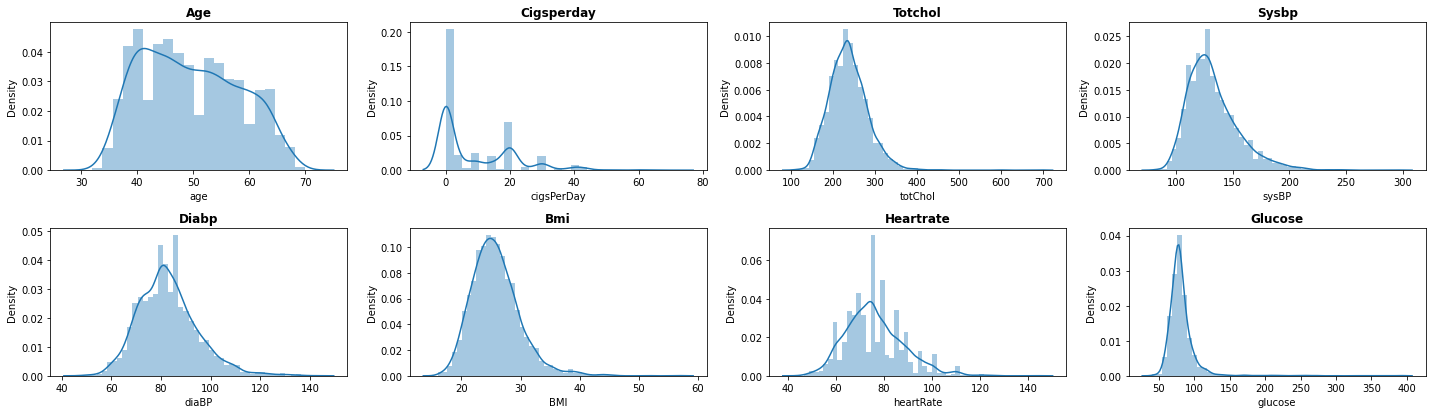

In [16]:
# Visualizing the distributions in distplot.
plt.figure(figsize=(20,14))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.distplot(heart_data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

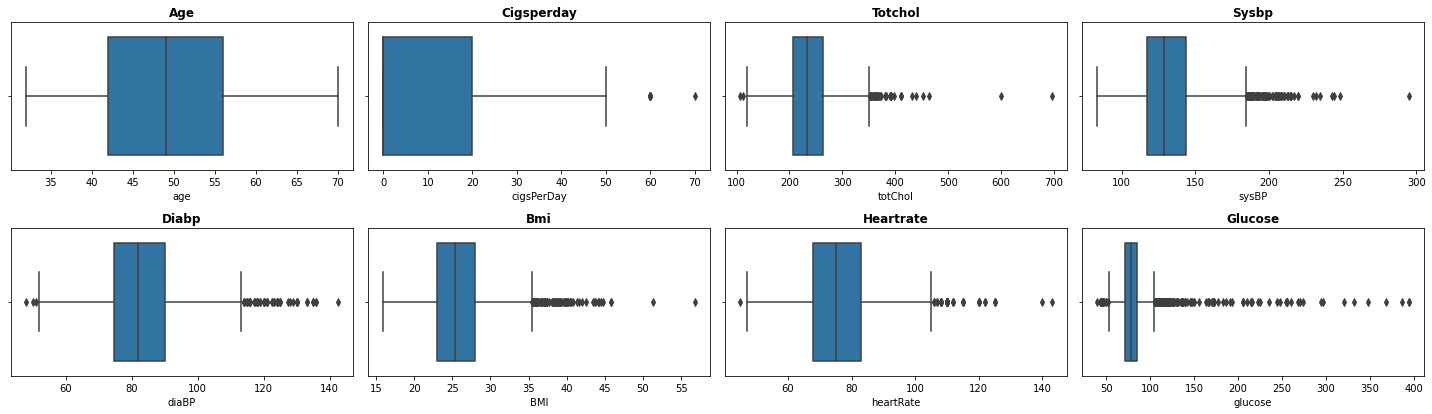

In [17]:
# Visualizing the distributions in boxplot.
plt.figure(figsize = (20,14))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(heart_data[column])
  plt.title(f'{column.title()}', weight = 'bold')
  plt.tight_layout()

<b> Visualization is the easiest way to have an inference about the overall data and the outliers.

##**Removing Outliers by standard Methods and plotting graphs**##

In [18]:
#Lets make a copy of dataset
df = heart_data.copy()

#Using IQR method to define inliners
for col in numeric_features:
  q1, q3, median = df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)
  

In [19]:
#removing outliers with median value
df[col] = np.where(df[col]>upper_limit, median,np.where(df[col]<upper_limit,median,df[col]))

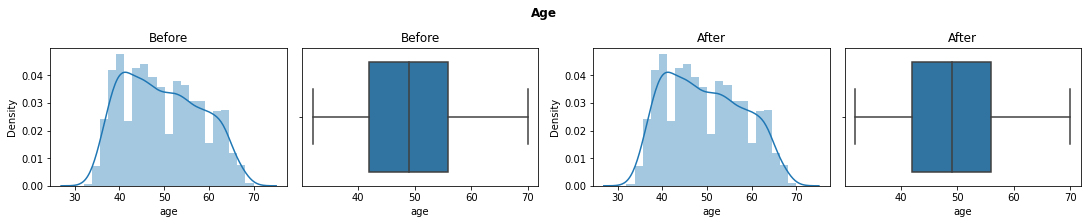

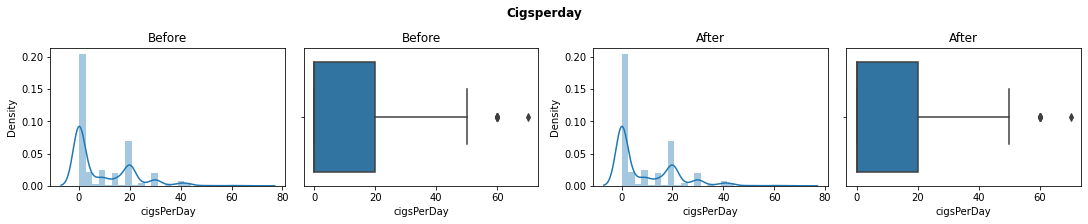

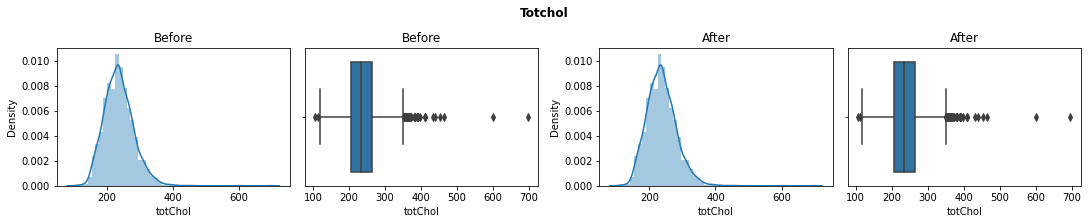

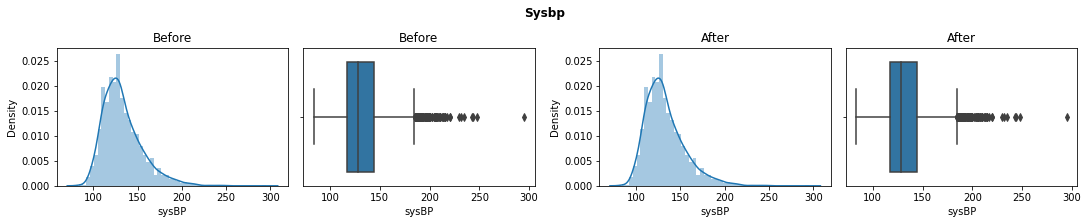

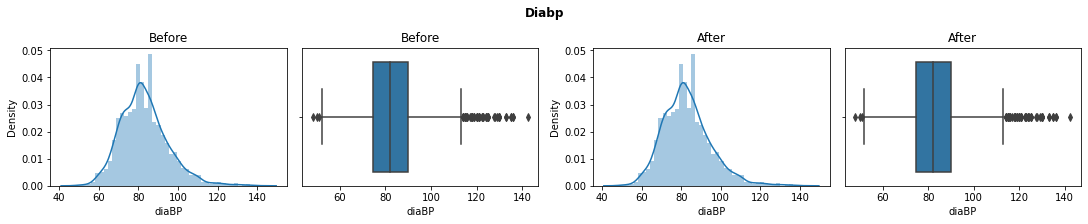

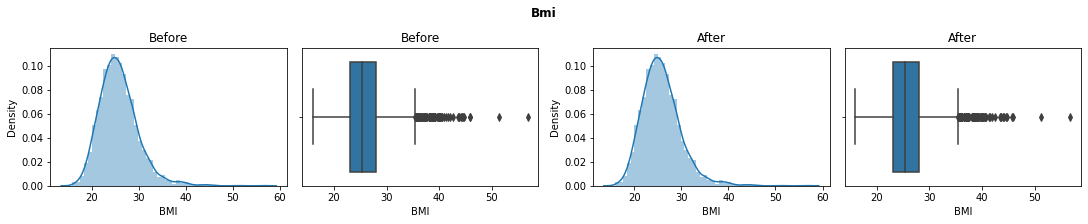

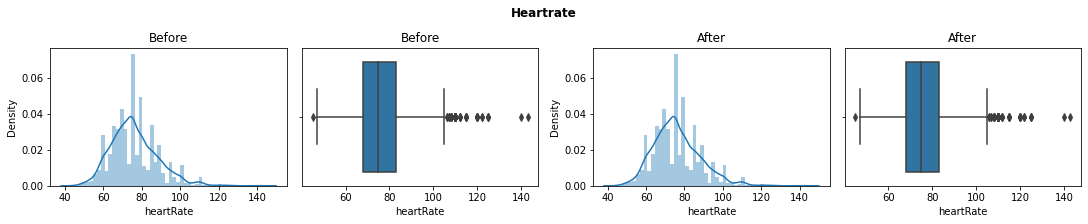

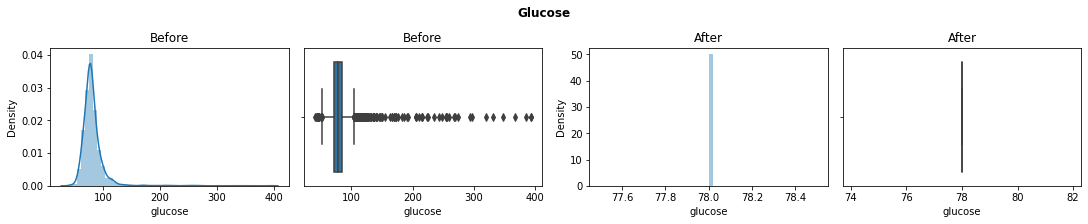

In [20]:
# Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(heart_data[col], ax=ax[0]).set(title="Before")
  sns.boxplot(heart_data[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(df[col], ax=ax[2]).set(title="After")
  sns.boxplot(df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

#**Cleaning and Manipulating Dataset**#

In [21]:
#checking for duplicates
print(len(df[df.duplicated()]))

0


In [22]:
#checking unique values with thier counts of categorical values
categorical_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [23]:
print(df['education'].value_counts())

1.0    1391
2.0    1077
3.0     549
4.0     373
Name: education, dtype: int64


In [24]:
print(df['sex'].value_counts())

F    1923
M    1467
Name: sex, dtype: int64


In [25]:
print(df['is_smoking'].value_counts())

NO     1703
YES    1687
Name: is_smoking, dtype: int64


In [26]:
print(df['BPMeds'].value_counts())

0.0    3290
1.0     100
Name: BPMeds, dtype: int64


In [27]:
print(df['prevalentStroke'].value_counts())

0    3368
1      22
Name: prevalentStroke, dtype: int64


In [28]:
print(df['prevalentHyp'].value_counts())

0    2321
1    1069
Name: prevalentHyp, dtype: int64


In [29]:
print(df['diabetes'].value_counts())

0    3303
1      87
Name: diabetes, dtype: int64


In [30]:
print(df['TenYearCHD'].value_counts())

0    2879
1     511
Name: TenYearCHD, dtype: int64


So we need to encode two of our variables which is 'sex' and 'is_smoking'

In [31]:
# Defining a label encoder based on above data
encoder = {'sex':{'M': 1, 'F': 0}, 'is_smoking':{'NO':0, 'YES':1}}

In [32]:
#Label encoding
df = df.replace(encoder)

In [33]:
#now check the data
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,78.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,78.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,78.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,78.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,78.0,0


<b> Here we can clearly see that all the features are numerical in nature now.

#**Univariate Analysis**#

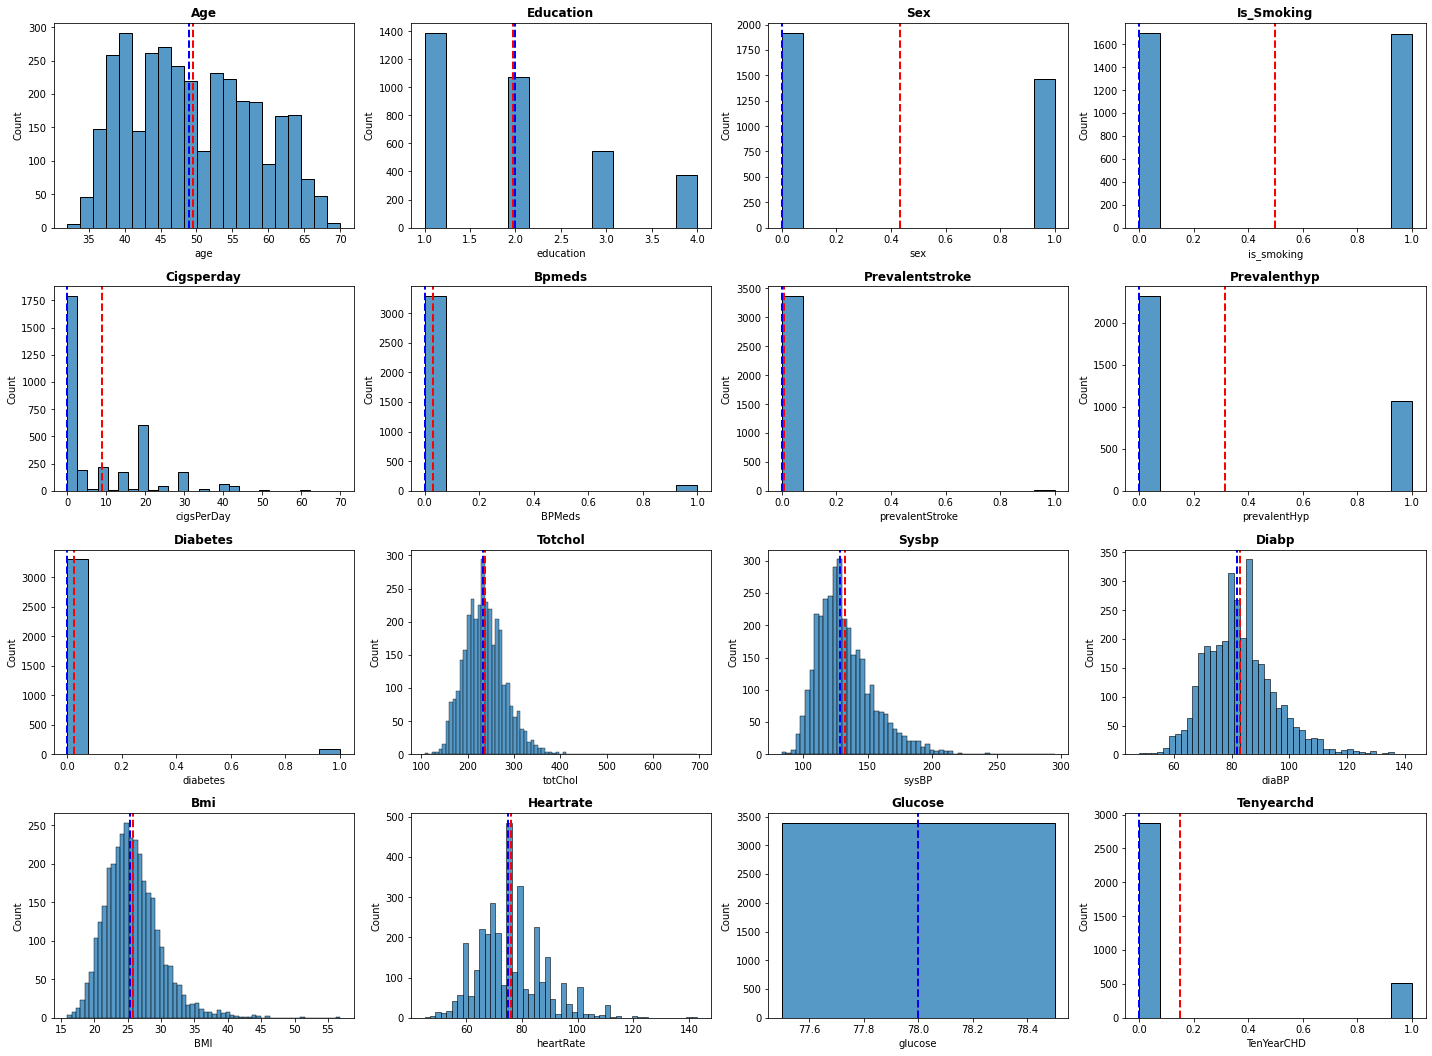

In [34]:
#Visualization of the mean and median for all the features
plt.figure(figsize=(20,18))
for n, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5,4,n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(),color = 'red', linestyle = 'dashed', linewidth=2)
  ax.axvline(feature.median(), color = 'blue', linestyle = 'dashed', linewidth = 2)
  plt.title(f'{column.title()}', weight = 'bold')
  plt.tight_layout()

#**Bivariate Analysis**#

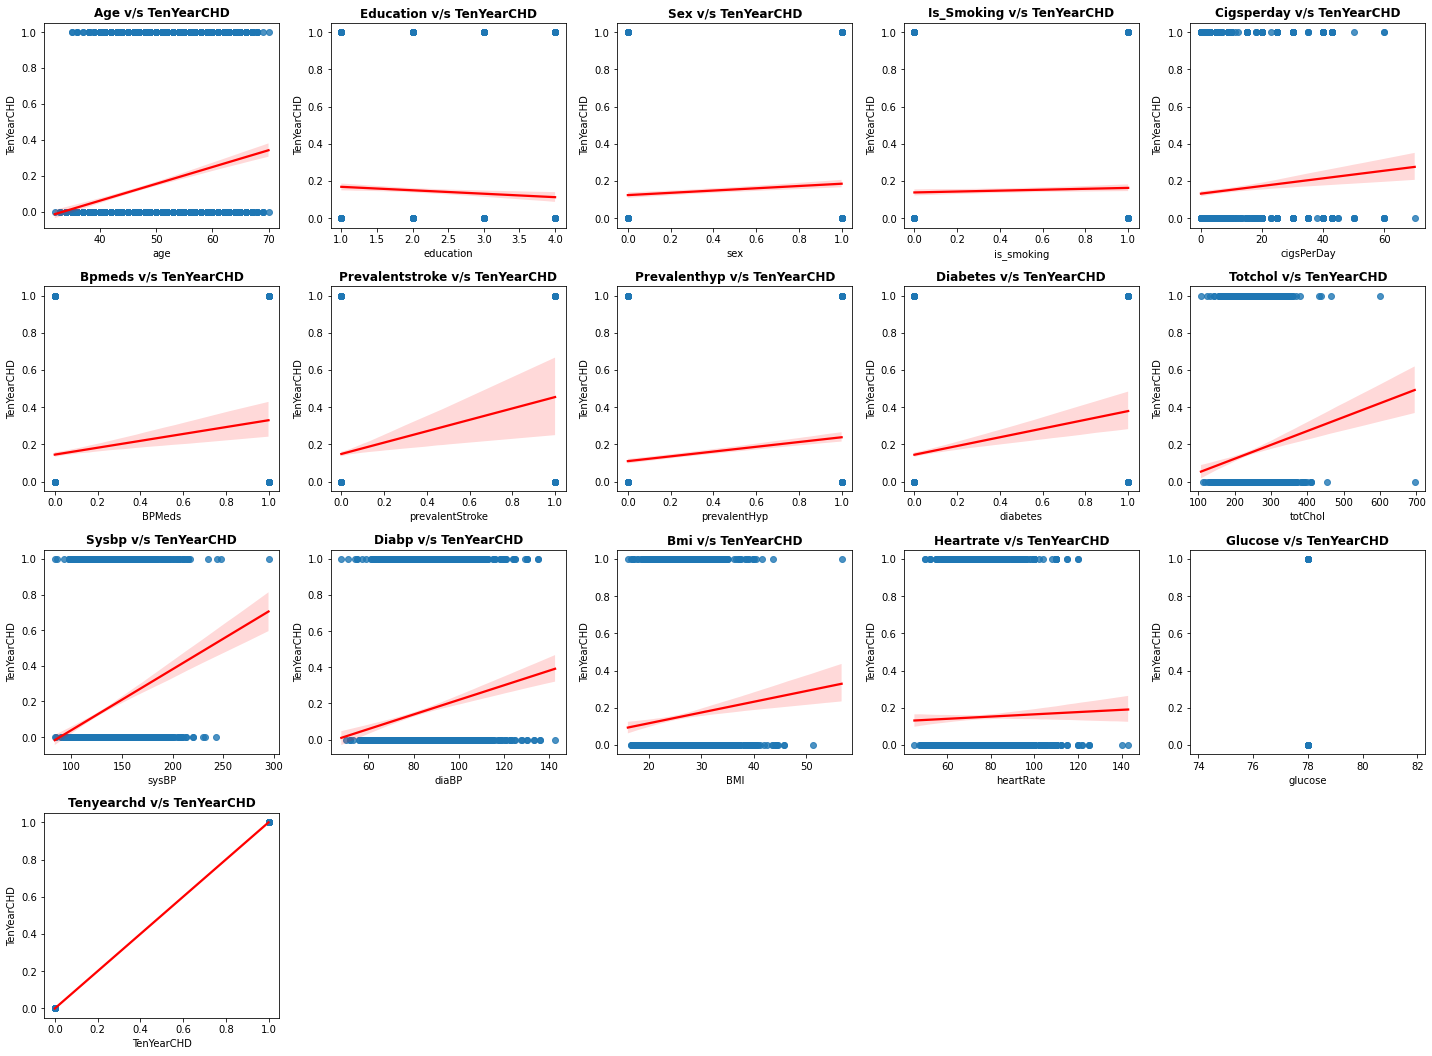

In [35]:
# Checking Linearity
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]
plt.figure(figsize=(20,18))
for n,column in enumerate(df.columns):
  plt.subplot(5,5,n+1)
  sns.regplot(x=df[column], y=df['TenYearCHD'], line_kws={'color':'red'})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

#**Removing Multicolinearity**#

In [36]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

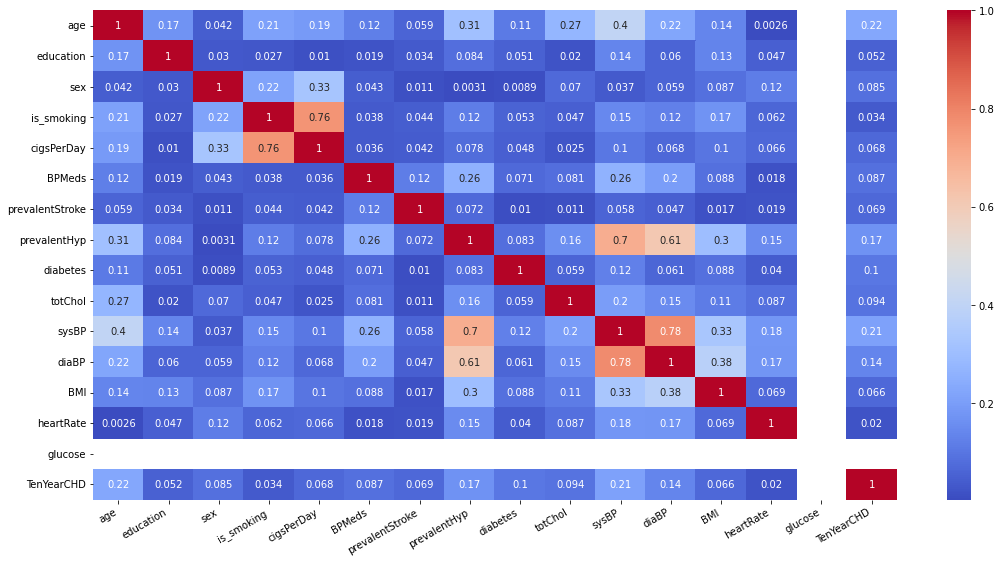

In [37]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#checking vif for each vvariable
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]
calc_vif(df[independent_variables])

,variables,VIF
0,glucose,182.840298
1,sysBP,3.735979
2,diaBP,2.904576
3,cigsPerDay,2.600491
4,is_smoking,2.481677
5,prevalentHyp,2.051836
6,age,1.376512
7,BMI,1.238311
8,sex,1.206409
9,totChol,1.112155


In [39]:
#Removing the variables who are highly correlated to each other 
independent_variables = [i for i in df.columns if i not in[ 'glucose']]
calc_vif(df[independent_variables])

,variables,VIF
0,sysBP,134.839251
1,diaBP,131.971719
2,BMI,44.162198
3,age,41.214768
4,heartRate,37.693924
5,totChol,30.705079
6,is_smoking,4.825269
7,education,4.736822
8,cigsPerDay,4.111284
9,prevalentHyp,2.376028


In [40]:
#Removing the variables who are highly correlated to each other 
independent_variables = [i for i in df.columns if i not in[ 'glucose', 'sysBP', 'diaBP', 'BMI', 'heartRate','totChol','TenYearCHD', 'is_smoking']]
calc_vif(df[independent_variables])

,variables,VIF
0,age,5.504983
1,education,4.099568
2,sex,1.978754
3,cigsPerDay,1.734073
4,prevalentHyp,1.684766
5,BPMeds,1.120373
6,diabetes,1.044865
7,prevalentStroke,1.024960


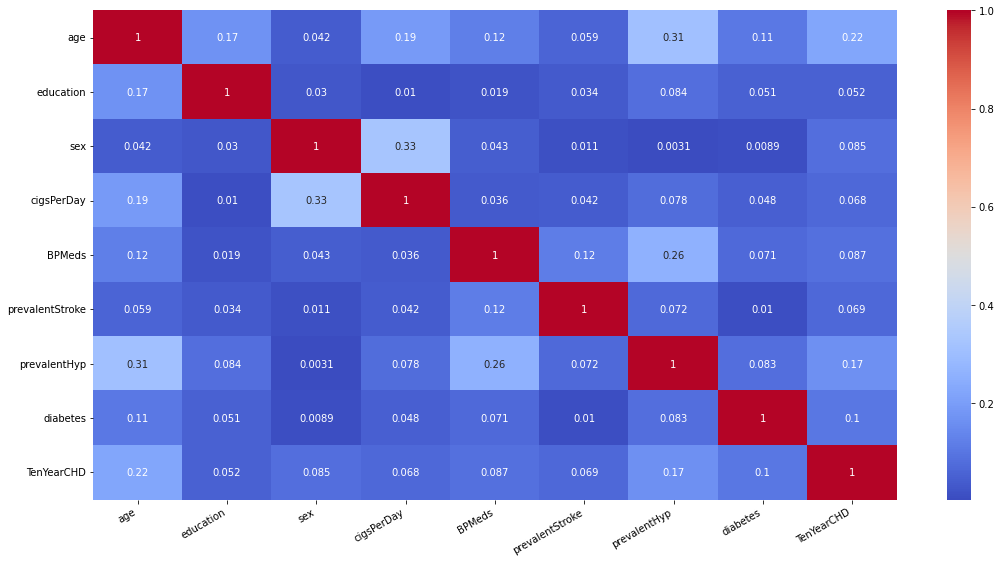

In [41]:
#Updated Dataset
dataset = df[independent_variables + ['TenYearCHD']]

#Checking correlation
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(dataset.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

#**Model Building**#

In [106]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [107]:
# Splitting the data into train and test
X = df[independent_variables]
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 0)

In [108]:
#Defining variables required
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
#Handling class imbalance by oversampling followed by removing the Tomek link
X_smote, y_smote = SMOTETomek(random_state=4).fit_resample(X_train, y_train)

#Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label +' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

#**Defining the function without CV and Hyperparameter Tuning**

In [109]:
#Creating an empty list for storing scoring metrics
train_accuracy_sco = []
test_accuracy_sco = []
train_roc_sco = []
test_roc_sco = []
train_f1_sco = []
test_f1_sco = []
train_precision_sco = []
test_precision_sco = []
train_recall_sco = []
test_recall_sco = []

In [110]:
#Defining a Fucntion without Hyperparameter and CV
def matrix_without_hp(X_train, y_train, X_test, y_test):
  Log = LogisticRegression()
  KNN = KNeighborsClassifier()
  svc = SVC()
  RFC = RandomForestClassifier()
  GBC = GradientBoostingClassifier()
  XGBC = XGBClassifier()
  DTree = DecisionTreeClassifier()
  SGD = SGDClassifier()

  models = [Log, KNN, svc, RFC, GBC, XGBC, DTree, SGD]

  for i in models:
    i.fit(X_train, y_train)
    y_pred_train = i.predict(X_train)
    y_pred_test = i.predict(y_test)

    #Accuracy score
    train_accuracy_sco = accuracy_score(y_train, y_pred_train)
    test_accuracy_sco = accuracy_score(y_test, y_pred_test)

    #Roc-auc score
    train_roc_sco = roc_auc_score(y_train, y_pred_train)
    test_roc_sco = roc_auc_score(y_test, y_pred_test)

    #F1 score
    train_f1_sco = f1_score(y_train, y_pred_train)
    test_f1_sco = f1_score(y_test, y_pred_train)

    #Precision score 
    train_precision_sco = precision_score(y_train, y_pred_train)
    test_precision_sco = precision_score(y_test, y_pred_test)

    #recall score
    train_recall_sco = recall_score(y_pred, y_pred_train)
    test_recall_sco = recall_score(y_test, y_pred_test)

    scores = pd.DataFrame(list(zip(train_accuracy_sco,test_accuracy_sco, train_roc_sco, test_roc_sco, train_f1_sco, test_f1_sco,
                                   train_precision_sco, test_precision_sco, train_recall_sco, test_recall_sco)))
    index = ['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'RandomForestClassifier', 'GradientBoostingClassifier',
             'XGBClassifier', 'DecisionTreeClassifier', 'SGDClassifier' ]
    columns = ['Train accuracy score','Test accuracy score', 'Train roc score', 'Test roc score', 'Train f1 score', 'Test f1 score',
               'Train precision score', 'Test precision score', 'Train recall score', 'Test recall score']


    return scores

#**Defining the function with CV and Hyperparameter Tuning**

In [84]:
#Creating an empty list for storing scoring metrics
train_accuracy_sco = []
test_accuracy_sco = []
train_roc_sco = []
test_roc_sco = []
train_f1_sco = []
test_f1_sco = []
train_precision_sco = []
test_precision_sco = []
train_recall_sco = []
test_recall_sco = []

In [85]:
##Defining a Fucntion with Hyperparameter and CV
def matrix(model, X_train, X_test, y_train, y_tEST, logistic = False):
  # fitting model
  model.fit(X_train,y_train)
  print('\n')
  print('='*30, 'Training score','='*30)
  training = model.score(X_train,y_train)
  print('\n')
  print('Training score  = ', training)
 
  print('\n')

  # if we are using grid search sc or random search cv printing best parameters and best score
  print('='*20, 'Best Parameters and Best score','='*20)
  try:
    print('best parameters  =  ', model.best_params_)
    print('Best score  =  ', model.best_score_)
  except:
    pass

  # predicting x_train
  y_pred_train = model.predict(X_train) 
  # predicting x_test
  y_pred_test = model.predict(X_test)
  print('\n')

  # printing all metrices scores on training set and test set
  print('='*30, 'Metrices scores on Train and Test Set','='*30)
  train_accuracy_sco = accuracy_score(y_train,y_pred_train)
  test_accuracy_sco = accuracy_score(y_test,y_pred_test)
  print('Train Accuracy score = ',train_accuracy_sco)
  print('Test Accuracy score = ',test_accuracy_sco)
  train_precision_sco = precision_score(y_train,y_pred_train)
  test_precision_sco = precision_score(y_test,y_pred_test)
  print('Train Precision score = ', train_precision_sco)
  print('Test Precision score = ', test_precision_sco)
  train_recall_sco = recall_score(y_train,y_pred_train)
  test_recall_sco = recall_score(y_test,y_pred_test)
  print('Train Recall score = ',train_recall_sco)
  print('Test Recall score = ',test_recall_sco)
  train_f1_sco = f1_score(y_train,y_pred_train)
  test_f1_sco = f1_score(y_test,y_pred_test)
  print('Train F1 score = ',train_f1_sco) 
  print('Test F1 score = ',test_f1_sco) 
  train_roc_sco = roc_auc_score(y_train,y_pred_train)
  test_roc_sco = roc_auc_score(y_test,y_pred_test)
  print('Train ROC_AUC score = ',train_roc_sco) 
  print('Test ROC_AUC score = ',test_roc_sco) 
  print('\n')

  # Classification Report on test set
  print('='*30, 'Metrices scores on Train and Test Set','='*30)
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test, y_pred_test, target_names=target_names))
  print('\n')
  # Classification Report on train set
  print('='*30, 'Classification Report on train set','='*30)
  target_names = ['class 0', 'class 1']
  print(classification_report(y_train, y_pred_train, target_names=target_names))
  print('\n')

  # Graph of cofusion matrix on test set
  print('='*30, 'Confusion Matrix on test set','='*30)
  cf_matrix = confusion_matrix(y_test,y_pred_test)
  plt.title('Heatmap of confusion matrix on test set')
  group_names = ['True Negative','False Positive','False Negative','True Positive']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
  plt.show()
  print('\n')

  # Graph of cofusion matrix on train set
  print('='*30, 'Confusion Matrix on train set','='*30)
  cf_matrix = confusion_matrix(y_train,y_pred_train)
  plt.title('Heatmap of confusion matrix on train set')
  group_names = ['True Negative','False Positive','False Negative','True Positive']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
  plt.show()
  print('\n')
  
  try:
  # logistc regression top 10 feature
    print('='*40, 'Top 10 Feature Importance','='*40)
    if logistic == True:
      top_10 = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(model.best_estimator_.coef_).ravel() }).sort_values("Importance",ascending =False)[:10].reset_index(drop=True)
    # for other models top 10 features 
    else :
      top_10 = pd.DataFrame({'Features':X.columns, 'Importance':(model.best_estimator_.feature_importances_)}).sort_values("Importance",ascending =False)[:10].reset_index(drop=True)
    
    sns.set(rc={'figure.figsize':(15,10)})
    ax=sns.barplot(x=X.columns[:10],y=top_10['Importance'])
    plt.xticks(rotation=90)
    for index, row in top_10.iterrows():
      ax.text(row.name,row.Importance, round(row.Importance,4), color='red', ha="center")
    plt.show()
  except:
    pass

  #roc_auc Curve
  test_fpr, test_tpr, test_threshold = roc_curve(y_test, y_pred_test)
  train_fpr, train_tpr, train_threshold = roc_curve(y_train, y_pred_train)
  test_roc_auc = auc(test_fpr, test_tpr)
  train_roc_auc = auc(train_fpr, train_tpr)

  # method I: plt
  plt.title('Receiver Operating Characteristic curves')
  plt.plot(test_fpr, test_tpr, 'b', label = 'Test AUC = %0.2f' % test_roc_auc,color='red')
  plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc,color='blue')
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return y_pred_train, y_pred_test

#**Define function for model explainability**

#**Lime**

In [86]:
def lime_explainibilty(model, num_features, instance):
  feature_names =list(X.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='classification')

  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict_proba, num_features=num_features)

  exp.show_in_notebook(show_table=True)

#**ELI5**

In [87]:
def eli5_explainability(model,row_number) :
  return eli.show_prediction(model, np.array(X_test.iloc[row_number]),
                    feature_names=X.columns.values,
                    show_feature_values=True)